# Deep Learning

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(42)

X = np.array([[100, 2], [150, 3], [200, 4], [250, 4], [300, 5]])
y = np.array([250, 350, 480, 550, 650])

In [ ]:
X_media = np.mean(X, axis = 0)
X_desv = np.std(X, axis = 0)
X_norm = (X - X_media) / X_desv

y_media = np.mean(y)
y_desv = np.std(y)
y_norm = (y - y_media) / y_desv

print(f'Caracteristicas normalizadas: {X_norm}')
print(f'Precios normalizados: {y_norm}')

Caracteristicas normalizadas: [[-1.41421356 -1.56892908]
 [-0.70710678 -0.58834841]
 [ 0.          0.39223227]
 [ 0.70710678  0.39223227]
 [ 1.41421356  1.37281295]]
Precios normalizados: [-1.45142421 -0.74684935  0.16909797  0.66230037  1.36687523]


In [ ]:
model_seq = Sequential()
model_seq.add(Dense(units = 1, input_dim = 2, activation = None))
model_seq.compile(optimizer = 'adam', loss = 'mean_squared_error')
model_seq.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model_seq.fit(X_norm, y_norm, epochs = 100, verbose = 0)

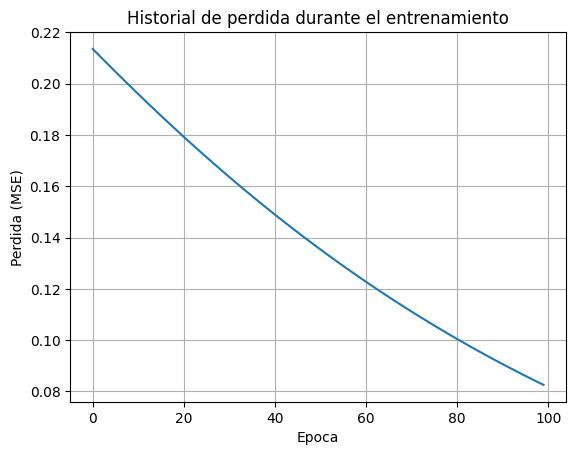

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Historial de perdida durante el entrenamiento')
plt.xlabel('Epoca')
plt.ylabel('Perdida (MSE)')
plt.grid()
plt.show()

In [ ]:
nueva_casa = np.array([[180, 3]])
nueva_casa_norm = (nueva_casa - X_media) / X_desv

precio_pred_norm = model_seq.predict(nueva_casa_norm, verbose = 0)
precio_pred = (precio_pred_norm * y_desv) + y_media
print(f'Precio para una cosas de 180 m^2 y 3 habitaciones: {precio_pred[0][0]:.2f}')

Precio para una cosas de 180 m^2 y 3 habitaciones: 433.28


In [ ]:
model_deep = Sequential()
model_deep.add(Dense(units = 64, input_dim = 2, activation = 'relu')) #Capa de entrada y primera capa oculta
model_deep.add(Dense(units = 32, activation = 'relu')) #Segunda capa oculta
model_deep.add(Dense(units = 16, activation = 'relu')) #Tercera capa oculta
model_deep.add(Dense(units = 1, activation = None)) #Capa de salida

model_deep.compile(optimizer = 'adam', loss = 'mean_squared_error')

model_deep.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

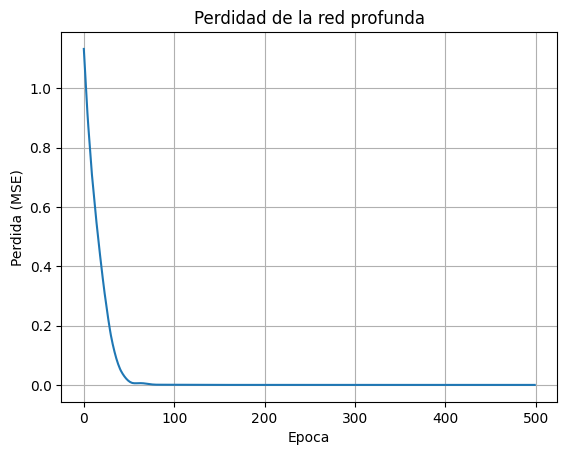

In [ ]:
history_deep = model_deep.fit(X_norm, y_norm, epochs = 500, verbose = 0)

plt.plot(history_deep.history['loss'])
plt.title('Perdidad de la red profunda')
plt.xlabel('Epoca')
plt.ylabel('Perdida (MSE)')
plt.grid()
plt.show()

In [ ]:
nueva_casa = np.array([[180, 3]])
nueva_casa_norm = (nueva_casa - X_media) / X_desv

precio_pred_norm = model_deep.predict(nueva_casa_norm, verbose = 0)

precio_pred = (precio_pred_norm * y_desv) + y_media

print(f'Prediccion (deep learning): {precio_pred[0][0]:.2f}')

Prediccion (deep learning): 381.20


In [ ]:
model_simp = Sequential()
model_simp.add(Dense(units = 1, input_dim = 2, activation = None))

model_simp.compile(optimizer = 'adam', loss = 'mean_squared_error')

history_simp = model_simp.fit(X_norm, y_norm, epochs = 100, verbose = 0)

precio_pred_norm = model_simp.predict(nueva_casa_norm, verbose = 0)
precio_pred = (precio_pred_norm * y_desv) + y_media

print(f'Prediccion (modelo simple): {precio_pred[0][0]:.2f}')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Prediccion (modelo simple): 445.82


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/creditcardfraud


In [15]:
import os
import pandas as pd

os.listdir(path)

dataset_path = os.path.join(path, 'creditcard.csv')
df = pd.read_csv(dataset_path)

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [21]:
class_count = df['Class'].value_counts()
class_count

,count
Class,
0,284315
1,492


In [23]:
total_transacciones = len(df)
porc_fraude = (class_count[1] / total_transacciones)
porc_no_fraude = (class_count[0] / total_transacciones)

print(f'Porcentaje de transacciones fraudulentas: {porc_fraude:.4f}')
print(f'Porcentaje de NO transacciones fraudulentas: {porc_no_fraude:.4f}')

Porcentaje de transacciones fraudulentas: 0.0017
Porcentaje de NO transacciones fraudulentas: 0.9983


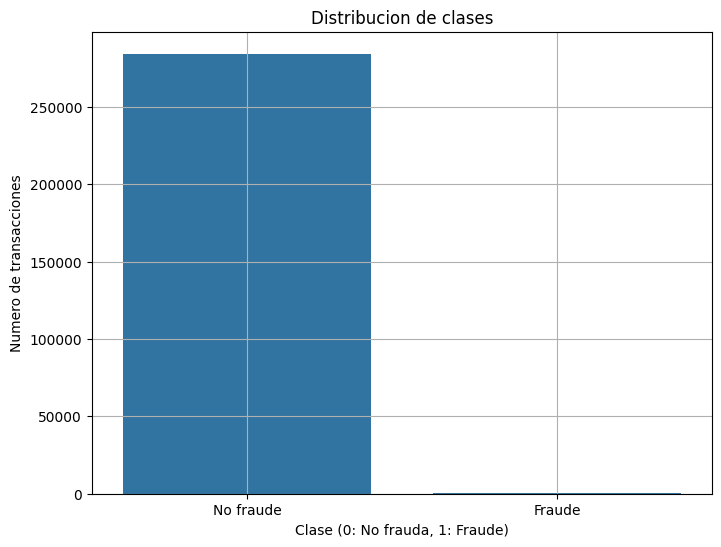

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

plt.figure(figsize = (8, 6))
sns.countplot(data= df, x = 'Class')
plt.title('Distribucion de clases')
plt.xlabel('Clase (0: No frauda, 1: Fraude)')
plt.ylabel('Numero de transacciones')
plt.xticks([0, 1], ['No fraude', 'Fraude'])
plt.grid()
plt.show()

In [27]:
X = df.drop(columns = ['Class'], axis = 1)
y = df['Class']

ss = StandardScaler()
X['Time'] = ss.fit_transform(X[['Time']])
X['Amount'] = ss.fit_transform(X[['Amount']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y) #stratify mantiene la proporciona de clases

print(f'Clases de entrenamiento:\n {y_train.value_counts(normalize = True)}')
print(f'Clases de prueba:\n {y_test.value_counts(normalize = True)}')

Clases de entrenamiento:
 Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64
Clases de prueba:
 Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64


In [28]:
class_weight = {'0' :1, '1': 50} #diccionario para manejar el desbalance
input_dim = X_train.shape[1]
print(f'Numero de caracteristicas de entrada: {input_dim}')

Numero de caracteristicas de entrada: 30


In [29]:
model = Sequential()
model.add(Dense(units = 16, input_dim = input_dim, activation = 'relu')) #activacion: reduce la linealidad
model.add(Dropout(0.5)) #regularacion, para evitar el sobre-ajuste
model.add(Dense(units = 8, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
print('Resumen de la arquitectura del modelo\n')
model.summary()

Resumen de la arquitectura del modelo



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True) #cantidad de epocas sin mejora en el entrenamiento para deternerlo

history = model.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_data = (X_test, y_test),
                    class_weight = class_weight, callbacks = [early_stopping])

loss, accuracy = model.evaluate(X_test, y_test, verbose = 0)
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')

y_pred_proba = model.predict(X_test)
y_pred = y_pred_proba = (y_pred_proba > 0.5).astype('int64')

cm = confusion_matrix(y_test, y_pred)
print(f'Matriz de confusion:\n {cm}')
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blue', xticklabels = ['No fraude', 'Fraude'], yticklabels = ['No fraude', 'Fraude'])
plt.show()

print(f'Classification report:\n {classification_report(y_test, y_pred)}', target_names = ['No fraude', 'Fraude'])

plt.figure(figsize = (12, 6))
plt.plot(history.history['loss'], label = 'Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize = (12, 6))
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/50
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9988 - loss: 0.0059 - val_accuracy: 0.9987 - val_loss: 0.0043
Epoch 2/50
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9987 - loss: 0.0064 - val_accuracy: 0.9986 - val_loss: 0.0043
Epoch 3/50
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.9988 - loss: 0.0060 - val_accuracy: 0.9983 - val_loss: 0.0050
Epoch 4/50
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9986 - loss: 0.0062 - val_accuracy: 0.9984 - val_loss: 0.0048
Epoch 5/50
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9985 - loss: 0.0071 - val_accuracy: 0.9989 - val_loss: 0.0041
Epoch 6/50
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.9988 - loss: 0.0053 - val_accuracy: 0.9985 - val_loss: 0.0046
Epoch 7/50
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.9987 - loss: 0.0061 - val_accuracy: 0.9986 - val_loss: 0.0043
Epoch 8/50
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9987 - loss: 0

KeyError: "'blue' is not a known colormap name"

<Figure size 800x600 with 0 Axes>